# Digital Signal Processing
## Computer Assignment 1
### Soroush Mesforush Mashhad
#### SID:810198472

Here we import the needed libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
import scipy as sp
import imageio as io
from  matplotlib import patches
from matplotlib.figure import Figure
from matplotlib import rcParams
from scipy import signal, misc
import matplotlib.cbook as cbook
import matplotlib.image as image
from skimage import color
import scipy.io.wavfile
from PIL import Image

## Question 1

### Part A

By using the definition of the even and parts of signals we shall write the code which decomposes a signal to odd and even parts

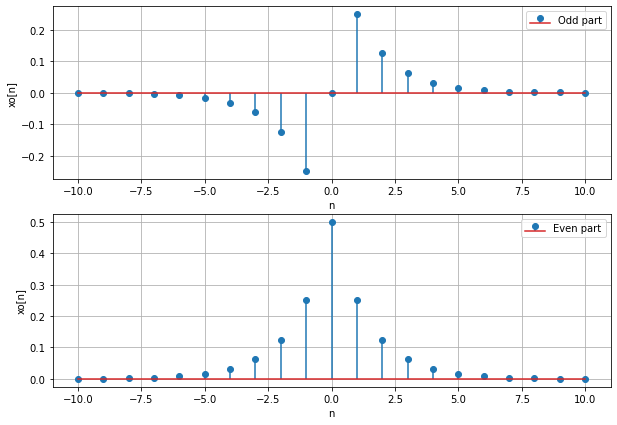

In [2]:
##First we define n in the given interval.
n=np.arange(start=-10, stop=11, step=1)
#Now we define x[n] and the odd and even parts accordingly
x = ((0.5)**n)*np.heaviside(n,0.5)
xe=0.5*(x+np.flip(x))
xo=0.5*(x-np.flip(x))
plt.figure(figsize=(10,7))
ax = plt.subplot(211)
ax.set_xlabel('n');
ax.set_ylabel('xo[n]');
ax.stem(n,xo,use_line_collection=True,label='Odd part');
ax.legend()
ax.grid()
ax = plt.subplot(212)
ax.set_xlabel('n');
ax.set_ylabel('xo[n]');
ax.stem(n,xe,use_line_collection=True,label='Even part');
ax.legend()
ax.grid()

## Part b

Here we shall go on to calculate the DTF of the signals and plot their magnitude firstly without fftshift.


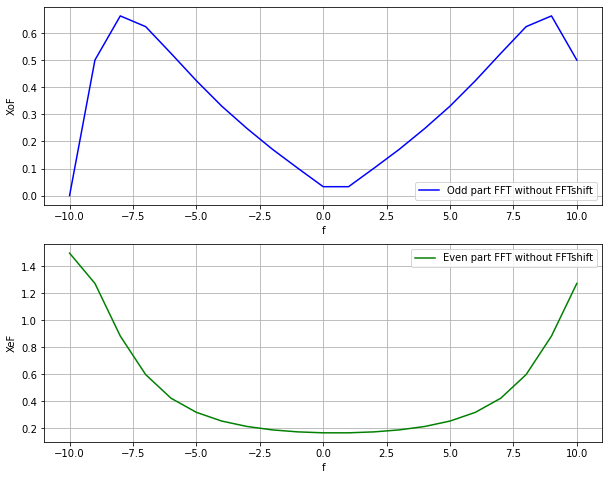

In [3]:
#We shall start by defining fs and f
fs=1
f=np.arange(start=-10, stop=11, step=fs)
#Now we shall calclulate with the help of the fft function.
XoF=np.fft.fft(xo)
XeF=np.fft.fft(xe)
plt.figure(figsize=(10,8))
ax = plt.subplot(211)
ax.set_xlabel('f');
ax.set_ylabel('XoF');
ax.plot(f,np.abs(XoF),label='Odd part FFT without FFTshift', color="blue");
ax.legend()
ax.grid()
ax = plt.subplot(212)
ax.set_xlabel('f');
ax.set_ylabel('XeF');
ax.plot(f,np.abs(XeF),label='Even part FFT without FFTshift', color="green");
ax.legend()
ax.grid()

Now we proceed to perform fftshift on the previous results

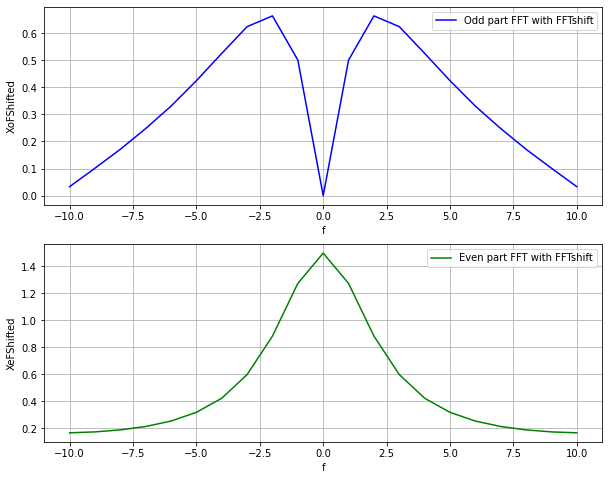

In [4]:
#We perform the fftshift here
XoFShifted=np.fft.fftshift(XoF)
XeFShifted=np.fft.fftshift(XeF)
plt.figure(figsize=(10,8))
ax = plt.subplot(211)
ax.set_xlabel('f');
ax.set_ylabel('XoFShifted');
ax.plot(f,np.abs(XoFShifted),label='Odd part FFT with FFTshift', color="blue");
ax.legend()
ax.grid()
ax = plt.subplot(212)
ax.set_xlabel('f');
ax.set_ylabel('XeFShifted');
ax.plot(f,np.abs(XeFShifted),label='Even part FFT with FFTshift', color="green");
ax.legend()
ax.grid()

We have an unwanted shift which must be resolved by using the fftshift function. The
fftshift function rearranges the output of fft by moving the zero-frequency
component to the center of the array,hence the visualization shall become
more understandable(whilst plotting of course.)

## Part C

By the relation that we have for the error and the fourier transform we continue as follows

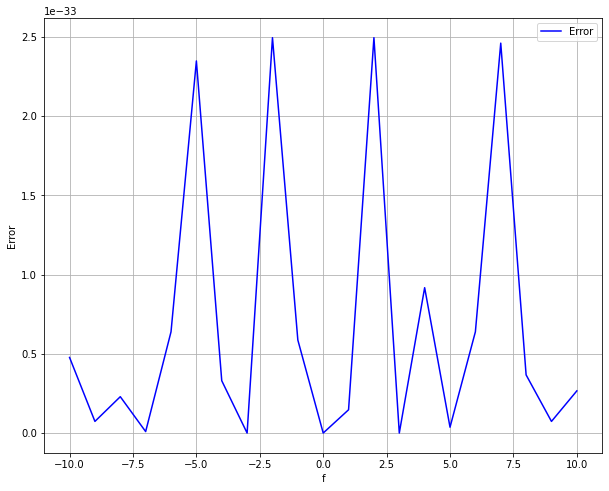

In [5]:
#First we calculate the fourier transforms.
XdecomposedF=XoFShifted+XeFShifted
XF=np.fft.fft(x)
XFShifted=np.fft.fftshift(XF)
Error=((XdecomposedF-XFShifted)**2)/len(n)
plt.figure(figsize=(10,8))
ax = plt.subplot(111)
ax.set_xlabel('f');
ax.set_ylabel('Error');
ax.plot(f,np.abs(Error),label='Error', color="blue");
ax.legend()
ax.grid()

As we can see the error is infinitesimal, hence we can conclued X(e^jw)=Xo(e^jw)+Xe(e^jw)

## Part D

Similar to part C we do the same analysis for the odd and even part of the signal

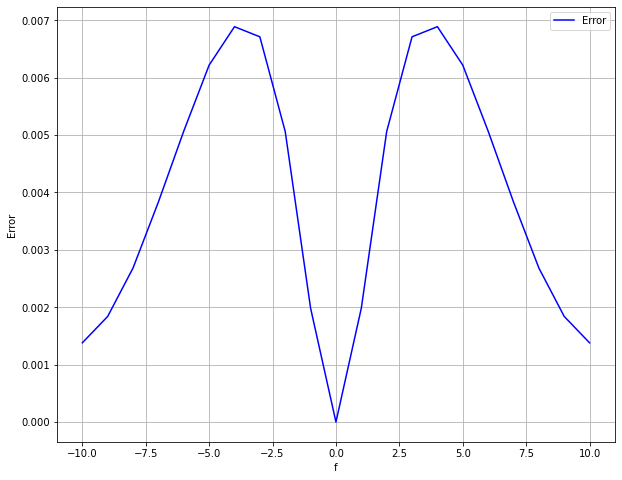

In [6]:
##First the even part.
Error_Ev=((XeFShifted-np.real(XdecomposedF))**2)/len(n)
plt.figure(figsize=(10,8))
ax = plt.subplot(111)
ax.set_xlabel('f');
ax.set_ylabel('Error');
ax.plot(f,np.abs(Error_Ev),label='Error', color="blue");
ax.legend()
ax.grid()

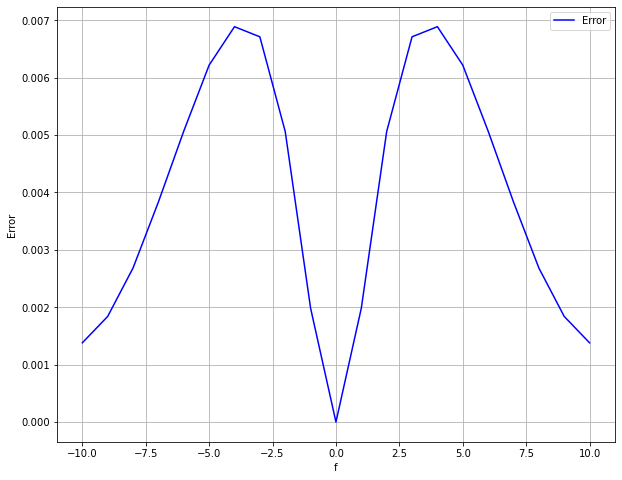

In [7]:
##Now the odd part.
Error_Odd=((XoFShifted-1j*np.imag(XdecomposedF))**2)/len(n)
plt.figure(figsize=(10,8))
ax = plt.subplot(111)
ax.set_xlabel('f');
ax.set_ylabel('Error');
ax.plot(f,np.abs(Error_Odd),label='Error', color="blue");
ax.legend()
ax.grid()

Due to the small amount of error in both cases we can conclude that Xe(e^jw)=Re(X(e^jw)), Xo(e^jw)=jIm(X(e^jw))

## Question 2

### Part A

First we design a function to create the sinusoid pulse

In [8]:
def Sinusoid(Amp,f,t,Off):
    sinusoid=Amp*np.sin(2*np.pi*f*t+Off)
    return sinusoid

### Part B

Here we write the DTF normalizer

In [9]:
def DFTNorm(Sig,SampleNum,fs):
    SigF=np.fft.fftshift(np.fft.fft(Sig))
    SigFNormalized=SigF/(0.5*SampleNum)
    f=fs*np.arange(int(-0.5*SampleNum),int(0.5*SampleNum))/SampleNum
    return SigFNormalized,f

### Part C&D

Here we write the aliasing function.


In [10]:
def aliasing(f):
    beg=0
    end=2
    fs=48000
    t=np.arange(beg,end,1/fs)
    sin=Sinusoid(1,f,t,0)
    SampleN=fs*(end-beg)
    print(SampleN)
    dft, freqs = DFTNorm(sin,SampleN,fs)
    frq= freqs/1000
    plt.figure(figsize=(10,8))
    ax = plt.subplot(111)
    ax.set_xlabel('f[khz]')
    ax.set_ylabel('Mag')
    ax.stem(frq,np.abs(dft),use_line_collection=True,label='Magnitude')
    ax.legend()
    ax.grid()

96000


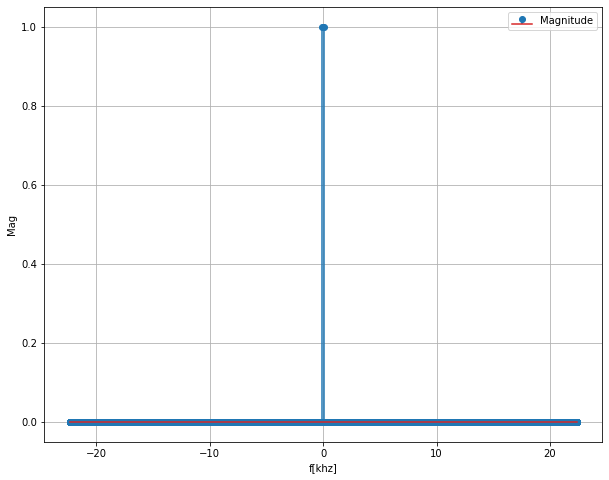

In [11]:
#for f=100
aliasing(100)

96000


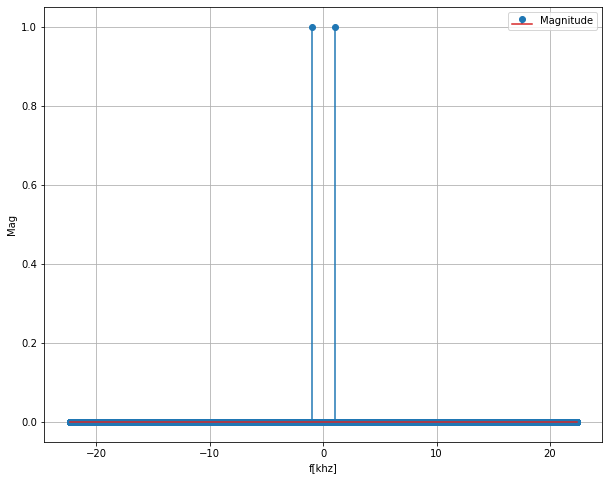

In [12]:
#for f=1000
aliasing(1000)

96000


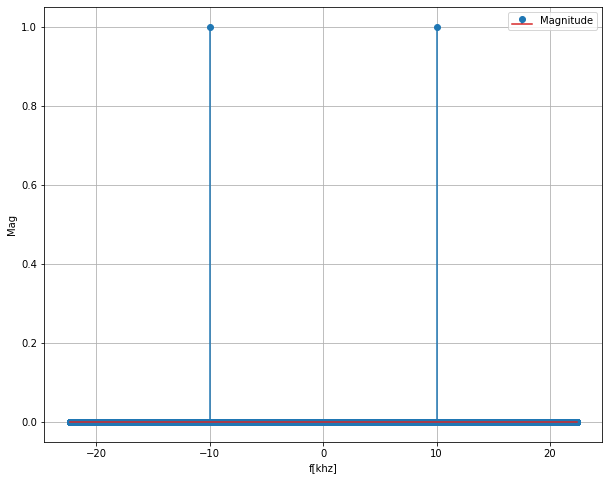

In [13]:
#for f=10000
aliasing(10000)

96000


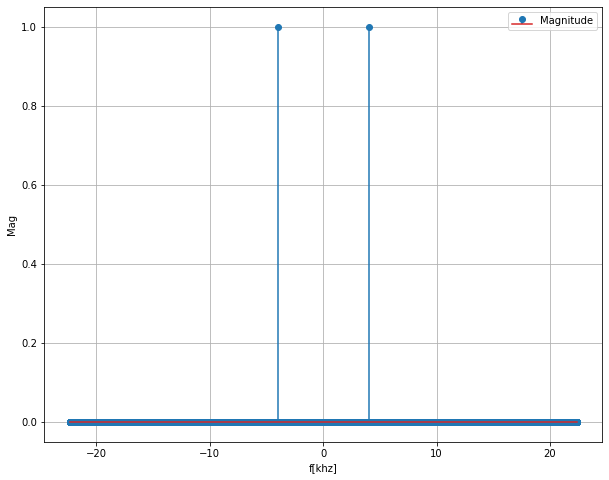

In [14]:
#for f=100000
aliasing(100000)

96000


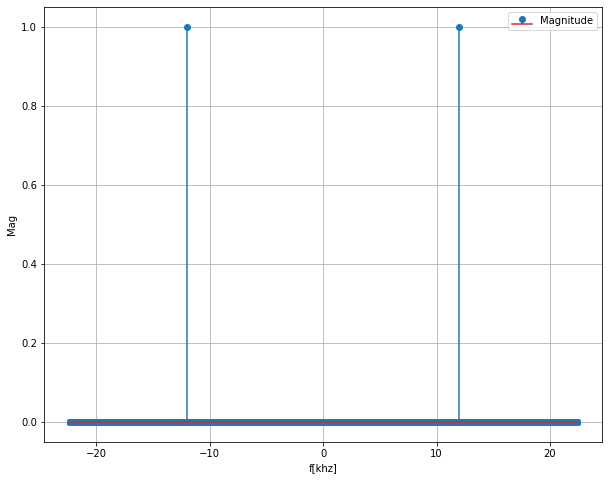

In [15]:
#for f=108000
aliasing(108000)

## Question 3

### Part A

Here we apply freq z to find H(e^jw)

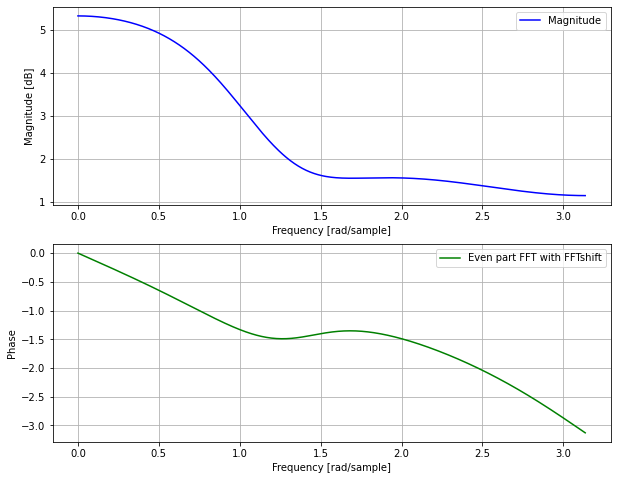

In [16]:
b=np.array([1,2,0,1])
a=np.array([1 ,-0.5, 0.25])
w,h=sp.signal.freqz(b,a)
plt.figure(figsize=(10,8))
ax = plt.subplot(211)
ax.set_ylabel('Magnitude [dB]');
ax.set_xlabel('Frequency [rad/sample]');
ax.plot(w, np.abs(h),label='Magnitude', color="blue");
ax.legend()
ax.grid()
ax = plt.subplot(212)
ax.set_ylabel('Phase');
ax.set_xlabel('Frequency [rad/sample]');
ax.plot(w,np.angle(h),label='Even part FFT with FFTshift', color="green");
ax.legend()
ax.grid()

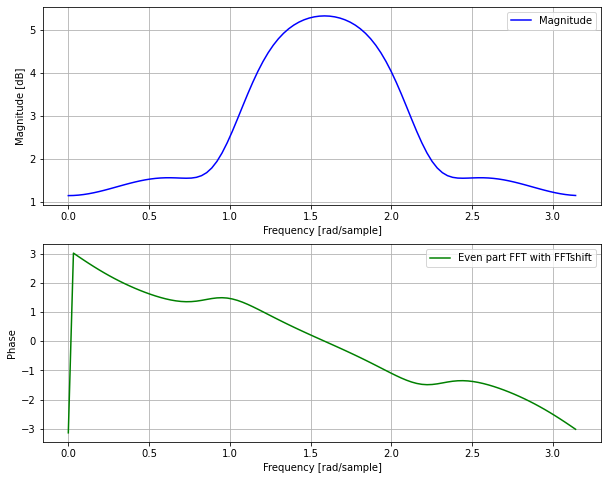

In [17]:
x=sp.signal.unit_impulse(100)
y=np.zeros(100)
for n in range(0,100):
    if n==0:
        y[0]=x[0]
    elif n==1:
        y[n]=0.5*y[n-1]+x[n]+2*x[n-1]+x[n-3]
    elif n==2 or n==3:
        y[n]=0.5*y[n-1]-0.25*y[n-2]+x[n]+2*x[n-1]+x[n-3]
    else:
        y[n]=0.5*y[n-1]-0.25*y[n-2]
Yf=np.fft.fftshift(np.fft.fft(y))
f=np.linspace(0,np.pi,100)
plt.figure(figsize=(10,8))
ax = plt.subplot(211)
ax.set_ylabel('Magnitude [dB]');
ax.set_xlabel('Frequency [rad/sample]');
ax.plot(f, np.abs(Yf),label='Magnitude', color="blue");
ax.legend()
ax.grid()
ax = plt.subplot(212)
ax.set_ylabel('Phase');
ax.set_xlabel('Frequency [rad/sample]');
ax.plot(f,np.angle(Yf),label='Even part FFT with FFTshift', color="green");
ax.legend()
ax.grid()

## Question 4

## Part a

This part has been done analytically.

## Part b

We use the given function in this part

In [18]:
def zplane(b,a,filename=None):
  # get a figure/plot
    ax = plt.subplot(111)
    # the unit circle
    uc = patches.Circle((0,0), radius=1, fill=False,
                        color='black', ls='dashed')
    ax.add_patch(uc)
    # The coefficients are less than 1, normalize the coeficients
    if np.max(b) > 1:
        kn = np.max(b)
        b = b/float(kn)
    else:
        kn = 1

    if np.max(a) > 1:
        kd = np.max(a)
        a = a/float(kd)
    else:
        kd = 1
        
    # ZEROS AND POLES
    p = np.roots(a)
    z = np.roots(b)
    k = kn/float(kd)
    
    t1 = plt.plot(z.real, z.imag, 'go', ms=10)
    plt.setp( t1, markersize=10.0, markeredgewidth=1.0,
              markeredgecolor='k', markerfacecolor='g')

    t2 = plt.plot(p.real, p.imag, 'rx', ms=10)
    plt.setp( t2, markersize=12.0, markeredgewidth=3.0,
              markeredgecolor='r', markerfacecolor='r')

    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    r = 1.5; plt.axis('scaled'); plt.axis([-r, r, -r, r])
    ticks = [-1, -.5, .5, 1]; plt.xticks(ticks); plt.yticks(ticks)

    if filename is None:
        plt.show()
    else:
        plt.savefig(filename)
    return z, p, k

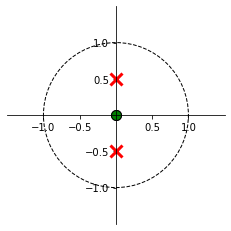

(array([0., 0.]), array([5.55111512e-17+0.5j, 5.55111512e-17-0.5j]), 1.0)

In [19]:
##First we plot the pole-zero plane as follows
omega0=np.pi/2
r=0.5
Numerator=[1,0,0]
Denominator=[1,-2*r*np.cos(omega0),r**2]
zplane(Numerator,Denominator)

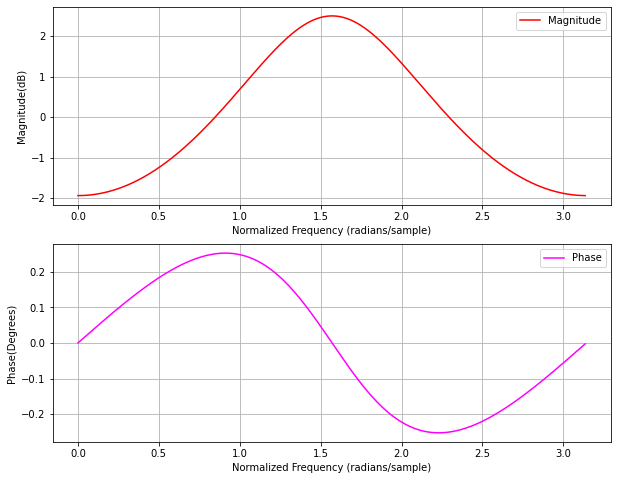

In [20]:
##Here we go on to plot the magnitude and phase of the transfer function.
w,h=signal.freqz(Numerator,Denominator)
Ang = np.unwrap(np.angle(h))
plt.figure(figsize=(10,8))
ax = plt.subplot(211)
ax.set_xlabel('Normalized Frequency (radians/sample)');
ax.set_ylabel('Magnitude(dB)');
ax.plot(w,20 *np.log10(abs(h)),color='red',label='Magnitude');
ax.grid()
ax.legend()
ax = plt.subplot(212)
ax.set_xlabel('Normalized Frequency (radians/sample)');
ax.set_ylabel('Phase(Degrees)');
ax.plot(w, Ang, color='magenta',label='Phase')
ax.legend()
ax.grid()

Now we proceed to calculate the impulse response.

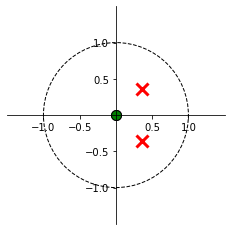

(array([0., 0.]), array([0.35355339+0.35355339j, 0.35355339-0.35355339j]), 1.0)

In [21]:
omega0=np.pi/4
r=0.5
Numerator=[1,0,0]
Denominator=[1,-2*r*np.cos(omega0),r**2]
zplane(Numerator,Denominator)

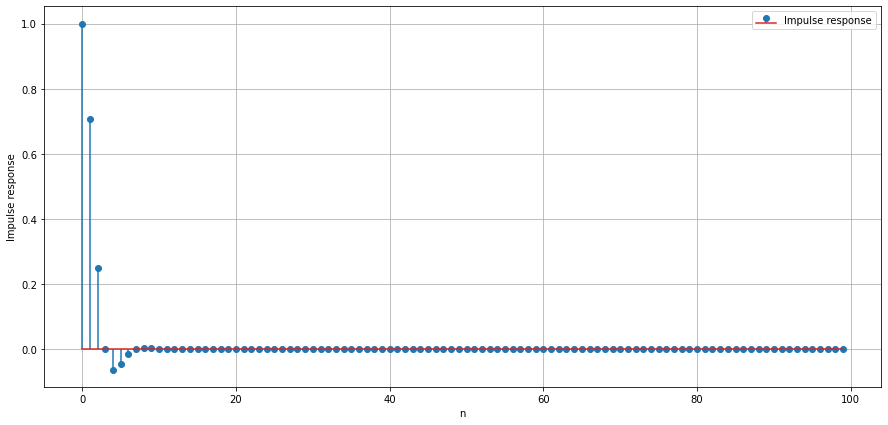

In [22]:
#Here we calculate the resiudes and poles.
Res,Poles,k=signal.residuez(Numerator,Denominator)
n=np.arange(start=0, stop=100, step=1)
h=np.real((Res[0]*(Poles[0])**n+Res[1]*(Poles[1])**n)*np.heaviside(n,1))
x=(1/2)**n*np.sqrt(2)*np.cos(((np.pi)/4)*(n-1))*np.heaviside(n,1)
plt.figure(figsize=(15,7))
ax = plt.subplot(111)
ax.set_xlabel('n');
ax.set_ylabel('Impulse response');
ax.stem(n,h,use_line_collection=True,label='Impulse response',);
ax.legend()
ax.grid()

## Question 5

### Part A

In [23]:
##We start by reading the audio file
fs,audio=scipy.io.wavfile.read('heatwaves.wav')
print("The sampling frequency is : ",'%d' %fs)

The sampling frequency is :  44100


### Part B

In [24]:
#Here we cut and save the first 5 seconds of our audio
audio5sec=audio[0:5*fs,:]
scipy.io.wavfile.write('Heatwaves5sec.wav',fs,audio5sec)

### Part C

Here we shall save the file with the respective sampling rates.

In [25]:
scipy.io.wavfile.write('Heatwaves5secfs.wav',fs,audio5sec)
scipy.io.wavfile.write('Heatwaves5sec2fs.wav',2*fs,audio5sec)
scipy.io.wavfile.write('Heatwaves5secfshalf.wav',int(0.5*fs),audio5sec)

It is obvious that when we sample at the normal rate, we shall get the sound at normal speed, when we increase the sample rate we literally increase the samples per second hence the voice becomes shorter and faster, and when we decrease the sampling rate the voice gets longer and slower.

### Part D

Here we go on to plot the magnitude of the voice of part B.

Here we plot the fourier transform of the audio for the first channel

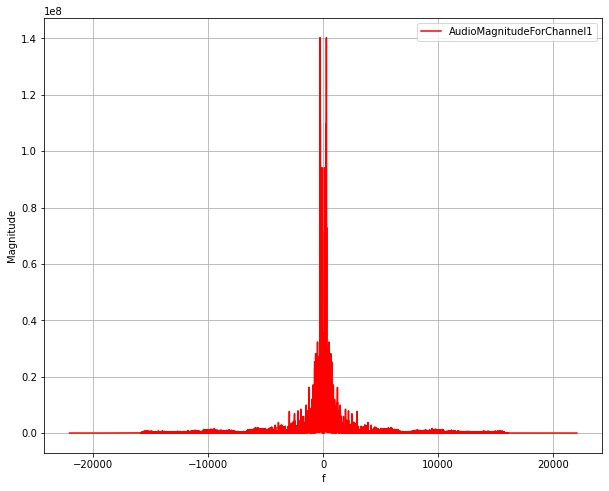

In [26]:
audio5secChannel1 = audio5sec[:,0]
audioBF=np.fft.fftshift(np.fft.fft(audio5secChannel1))
magaudioBF=np.abs(audioBF)
#Here we normalize the plotting range
f=np.linspace(-fs/2,fs/2,220500)
plt.figure(figsize=(10,8))
ax = plt.subplot(111)
ax.set_xlabel('f');
ax.set_ylabel('Magnitude');
ax.plot(f,magaudioBF,label='AudioMagnitudeForChannel1', color="red");
ax.legend()
ax.grid()

Here we plot the fourier transform of the audio for the second channel

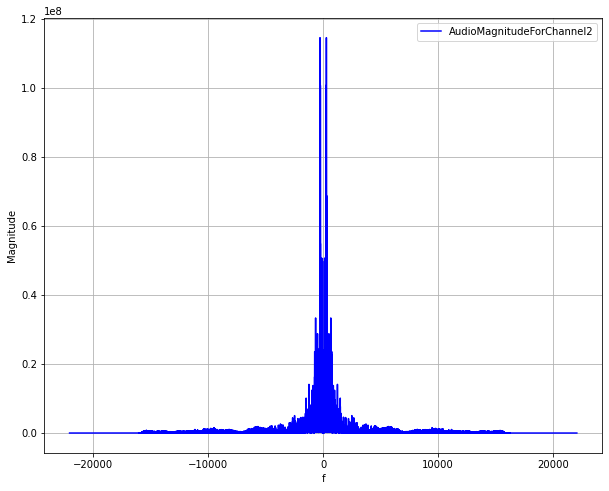

In [27]:
audio5secChannel2 = audio5sec[:,1]
audioBF=np.fft.fftshift(np.fft.fft(audio5secChannel2))
magaudioBF=np.abs(audioBF)
#Here we normalize the plotting range
f=np.linspace(-fs/2,fs/2,220500)
plt.figure(figsize=(10,8))
ax = plt.subplot(111)
ax.set_xlabel('f');
ax.set_ylabel('Magnitude');
ax.plot(f,magaudioBF,label='AudioMagnitudeForChannel2', color="blue");
ax.legend()
ax.grid()

### Part E

Here we implement a function to compress the voice of part B

In [28]:
def Compressor(audio,M):
    Len=len(audio)
    LenOut=0
    for i in range(1,Len+1):
        if np.mod(i,M) == 0:
            LenOut=LenOut+1    
    audiocompressed=np.zeros((LenOut,2))
    for j in range(0,2):
        for i in range(1,Len):
            if np.mod(i,M) == 0:
                 audiocompressed[int(i/M),j]=audio[i,j]
    return audiocompressed

### Part F

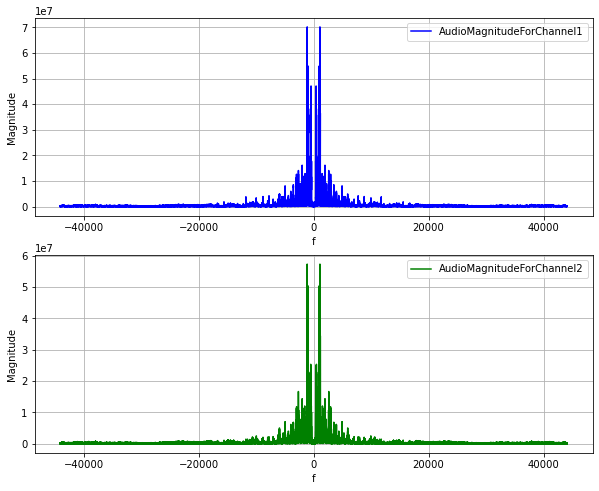

In [29]:
## For M=2 we have
audioDS2=Compressor(audio5sec,2)
audioDS2Channel1 = audioDS2[:,0]
audioDS2Channel2 = audioDS2[:,1]
audioBFDS2Channel1=np.fft.fftshift(np.fft.fft(audioDS2Channel1))
audioBFDS2Channel2=np.fft.fftshift(np.fft.fft(audioDS2Channel2))
magaudioBFDS2C1=np.abs(audioBFDS2Channel1)
magaudioBFDS2C2=np.abs(audioBFDS2Channel2)
#Here we normalize the plotting range
f=np.linspace(-fs,fs,110250)
plt.figure(figsize=(10,8))
ax = plt.subplot(211)
ax.set_xlabel('f');
ax.set_ylabel('Magnitude');
ax.plot(f,magaudioBFDS2C1,label='AudioMagnitudeForChannel1', color="blue");
ax.legend()
ax.grid()
ax = plt.subplot(212)
ax.set_xlabel('f');
ax.set_ylabel('Magnitude');
ax.plot(f,magaudioBFDS2C2,label='AudioMagnitudeForChannel2', color="green");
ax.legend()
ax.grid()

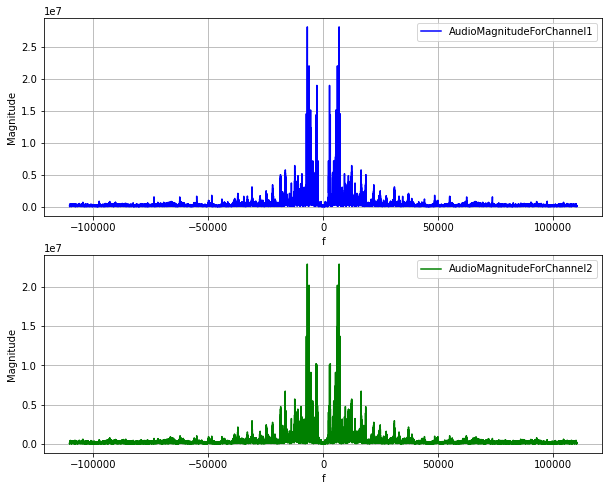

In [30]:
## For M=5 we have
audioDS5=Compressor(audio5sec,5)
audioDS5Channel1 = audioDS5[:,0]
audioDS5Channel2 = audioDS5[:,1]
audioBFDS5Channel1=np.fft.fftshift(np.fft.fft(audioDS5Channel1))
audioBFDS5Channel2=np.fft.fftshift(np.fft.fft(audioDS5Channel2))
magaudioBFDS5C1=np.abs(audioBFDS5Channel1)
magaudioBFDS5C2=np.abs(audioBFDS5Channel2)
#Here we normalize the plotting range
f=np.linspace(-2.5*fs,2.5*fs,44100)
plt.figure(figsize=(10,8))
ax = plt.subplot(211)
ax.set_xlabel('f');
ax.set_ylabel('Magnitude');
ax.plot(f,magaudioBFDS5C1,label='AudioMagnitudeForChannel1', color="blue");
ax.legend()
ax.grid()
ax = plt.subplot(212)
ax.set_xlabel('f');
ax.set_ylabel('Magnitude');
ax.plot(f,magaudioBFDS5C2,label='AudioMagnitudeForChannel2', color="green");
ax.legend()
ax.grid()

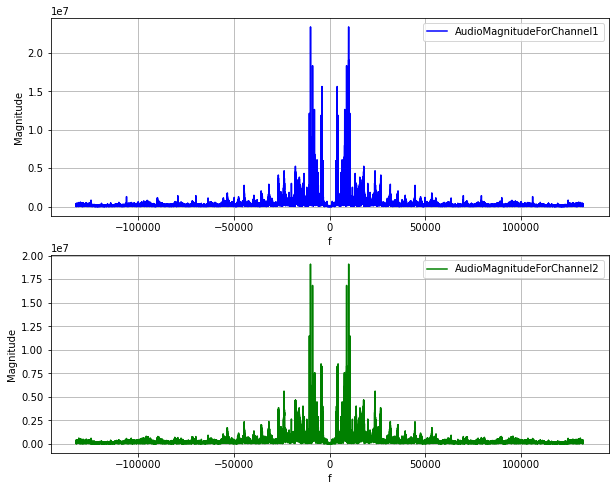

In [31]:
## For M=6 we have
audioDS6=Compressor(audio5sec,6)
audioDS6Channel1 = audioDS6[:,0]
audioDS6Channel2 = audioDS6[:,1]
audioBFDS6Channel1=np.fft.fftshift(np.fft.fft(audioDS6Channel1))
audioBFDS6Channel2=np.fft.fftshift(np.fft.fft(audioDS6Channel2))
magaudioBFDS6C1=np.abs(audioBFDS6Channel1)
magaudioBFDS6C2=np.abs(audioBFDS6Channel2)
#Here we normalize the plotting range
f=np.linspace(-3*fs,3*fs,36750)
plt.figure(figsize=(10,8))
ax = plt.subplot(211)
ax.set_xlabel('f');
ax.set_ylabel('Magnitude');
ax.plot(f,magaudioBFDS6C1,label='AudioMagnitudeForChannel1', color="blue");
ax.legend()
ax.grid()
ax = plt.subplot(212)
ax.set_xlabel('f');
ax.set_ylabel('Magnitude');
ax.plot(f,magaudioBFDS6C2,label='AudioMagnitudeForChannel2', color="green");
ax.legend()
ax.grid()

We see that by compressing the audio its magnitude decreases by a factor of 1/M and the bandwidth increases by a factor of M.

### Part F

Here we write a function to upsample

In [32]:
def Expander(audio,L):
    Len=len(audio)
    LenOut=Len*L
    audioexpanded=np.zeros((LenOut,2))
    for j in range(0,2):
        for i in range(1,Len):
            if np.mod(i,L) == 0:
                 audioexpanded[i,j]=audio[int(i/L),j]
            else:
                 audioexpanded[i,j]=0
    return audioexpanded

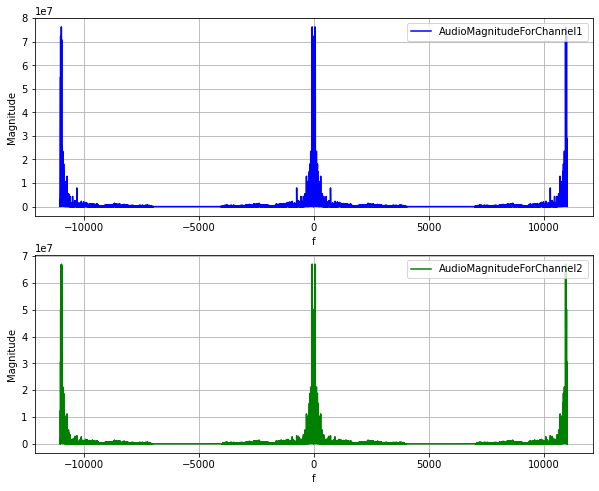

In [33]:
## For L=2 we have
audioUS2=Expander(audio5sec,2)
audioUS2Channel1 = audioUS2[:,0]
audioUS2Channel2 = audioUS2[:,1]
audioBFUS2Channel1=np.fft.fftshift(np.fft.fft(audioUS2Channel1))
audioBFUS2Channel2=np.fft.fftshift(np.fft.fft(audioUS2Channel2))
magaudioBFUS2C1=np.abs(audioBFUS2Channel1)
magaudioBFUS2C2=np.abs(audioBFUS2Channel2)
#Here we normalize the plotting range
f=np.linspace(-fs/4,fs/4,441000)
plt.figure(figsize=(10,8))
ax = plt.subplot(211)
ax.set_xlabel('f');
ax.set_ylabel('Magnitude');
ax.plot(f,magaudioBFUS2C1,label='AudioMagnitudeForChannel1', color="blue");
ax.legend()
ax.grid()
ax = plt.subplot(212)
ax.set_xlabel('f');
ax.set_ylabel('Magnitude');
ax.plot(f,magaudioBFUS2C2,label='AudioMagnitudeForChannel2', color="green");
ax.legend()
ax.grid()

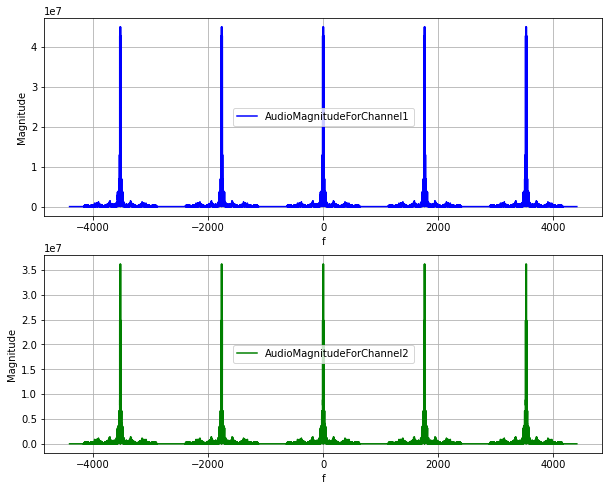

In [34]:
## For L=5 we have
audioUS5=Expander(audio5sec,5)
audioUS5Channel1 = audioUS5[:,0]
audioUS5Channel2 = audioUS5[:,1]
audioBFUS5Channel1=np.fft.fftshift(np.fft.fft(audioUS5Channel1))
audioBFUS5Channel2=np.fft.fftshift(np.fft.fft(audioUS5Channel2))
magaudioBFUS5C1=np.abs(audioBFUS5Channel1)
magaudioBFUS5C2=np.abs(audioBFUS5Channel2)
#Here we normalize the plotting range
f=np.linspace(-fs/10,fs/10,1102500)
plt.figure(figsize=(10,8))
ax = plt.subplot(211)
ax.set_xlabel('f');
ax.set_ylabel('Magnitude');
ax.plot(f,magaudioBFUS5C1,label='AudioMagnitudeForChannel1', color="blue");
ax.legend()
ax.grid()
ax = plt.subplot(212)
ax.set_xlabel('f');
ax.set_ylabel('Magnitude');
ax.plot(f,magaudioBFUS5C2,label='AudioMagnitudeForChannel2', color="green");
ax.legend()
ax.grid()

F:\Softwares\Anaconda\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


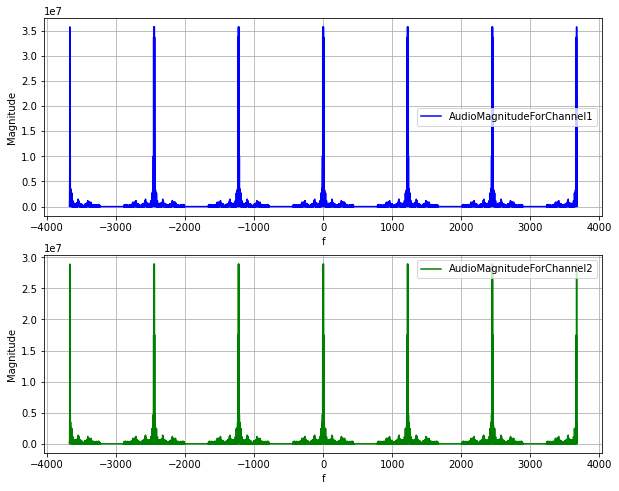

In [35]:
## For L=6 we have
audioUS6=Expander(audio5sec,6)
audioUS6Channel1 = audioUS6[:,0]
audioUS6Channel2 = audioUS6[:,1]
audioBFUS6Channel1=np.fft.fftshift(np.fft.fft(audioUS6Channel1))
audioBFUS6Channel2=np.fft.fftshift(np.fft.fft(audioUS6Channel2))
magaudioBFUS6C1=np.abs(audioBFUS6Channel1)
magaudioBFUS6C2=np.abs(audioBFUS6Channel2)
#Here we normalize the plotting range
f=np.linspace(-fs/12,fs/12,1323000)
plt.figure(figsize=(10,8))
ax = plt.subplot(211)
ax.set_xlabel('f');
ax.set_ylabel('Magnitude');
ax.plot(f,magaudioBFUS6C1,label='AudioMagnitudeForChannel1', color="blue");
ax.legend()
ax.grid()
ax = plt.subplot(212)
ax.set_xlabel('f');
ax.set_ylabel('Magnitude');
ax.plot(f,magaudioBFUS6C2,label='AudioMagnitudeForChannel2', color="green");
ax.legend()
ax.grid()

We see that as expected by upsampling the audio by L, the magnitude gets bigger by a factor of L and the bandwidth decreases by a factor of 1/L

### Part H

When we upsample a signal we inadvertantly add a hefty amount of zeros, an approach would be to perform interpolation, in other words we could replace the zeros with the average of the samples before and after it, hence we increase the quality.(Didn't have time to implement it.)

## Question 6

### Part A

Here we shall open the photos

(-0.5, 666.5, 833.5, -0.5)

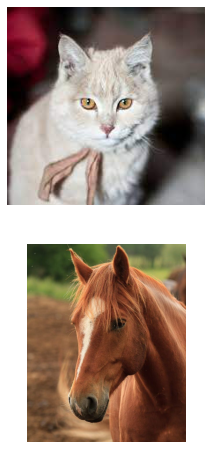

In [36]:
##Here we open the photos with the help of built in functions.
cat=Image.open('cat.jpg')
horse=Image.open('horse.jpg')
#We show the preliminary photos
plt.figure(figsize=(8,8))
ax = plt.subplot(211)
ax.imshow(cat)
ax.axis('off')
ax = plt.subplot(212)
ax.imshow(horse)
ax.axis('off')

### Part B

(-0.5, 666.5, 833.5, -0.5)

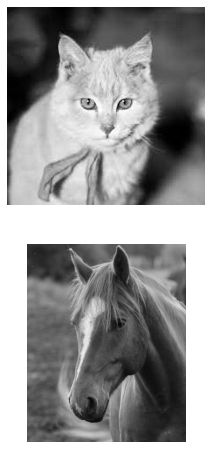

In [37]:
##Here we proceed to read and save the magnitude and phase of each photos
catgray=cat.convert('L')
horsegray=horse.convert('L')
plt.figure(figsize=(8,8))
ax = plt.subplot(211)
ax.imshow(catgray,cmap='gray')
ax.axis('off')
ax = plt.subplot(212)
ax.imshow(horsegray,cmap='gray')
ax.axis('off')

In [38]:
print(np.shape(horsegray))
print(np.shape(catgray))

(834, 667)
(225, 225)


Here we resize the photos so that they have the same size.


(834, 667)


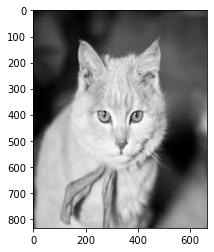

In [39]:
catresized=catgray.resize((667,834))
print(np.shape(catresized))
plt.imshow(catresized,cmap='gray')

In [40]:
catF=np.fft.fftshift(np.fft.fft2(catresized))
horseF=np.fft.fftshift(np.fft.fft2(horsegray))
magcat=np.abs(catF)
maghorse=np.abs(horseF)
phasecat=np.angle(catF)
phasehorse=np.angle(horseF)

### Part C

Here we shall attempt to change the magnitude of the two photos and display them accordingly.

In [41]:
##We go on to switch the magnitudes
catcombined=np.multiply(maghorse, np.exp(1j*phasecat))
catchangedMag=np.real(np.fft.ifft2(np.fft.fftshift(catcombined)))
horsecombined=np.multiply(magcat, np.exp(1j*phasehorse))
horsechangedMag=np.real(np.fft.ifft2(np.fft.fftshift(horsecombined)))

(-0.5, 666.5, 833.5, -0.5)

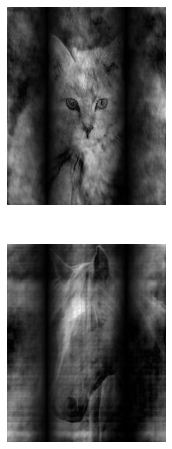

In [42]:
##Now we proceed to display the images
plt.figure(figsize=(8,8))
ax = plt.subplot(211)
ax.imshow(np.abs(catchangedMag),cmap='gray')
ax.axis('off')
ax = plt.subplot(212)
ax.imshow(np.abs(horsechangedMag),cmap='gray')
ax.axis('off')